<a href="https://colab.research.google.com/github/AritraStark/Deeplense_GSOC_2022/blob/main/Deeplense_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset: 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip -qq gdrive/MyDrive/dataset_deeplense.zip
print('Extraction done.')

Mounted at /content/gdrive
Extraction done.


Setting up imports:

In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Previewing the data:

Samples with no substructure: 


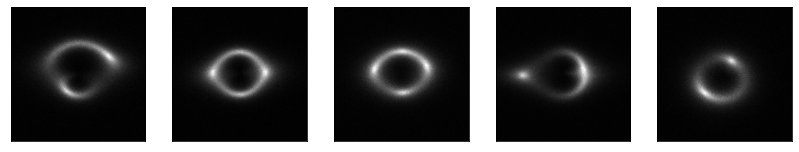

Samples with spherical substructure: 


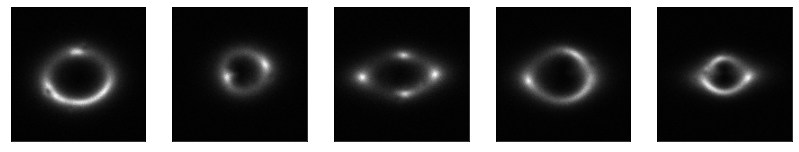

Samples with vortex substructure: 


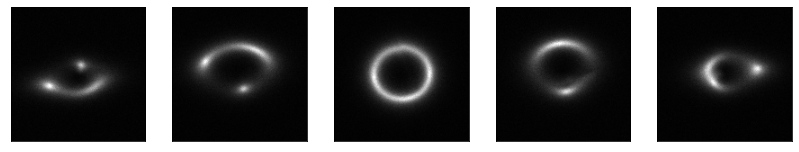

In [3]:
# Define the input paths
train_path1 = './dataset/train/no'
train_files1 = [os.path.join(train_path1, f) for f in os.listdir(train_path1) if f.endswith(".npy")]
train_path2 = './dataset/train/sphere'
train_files2 = [os.path.join(train_path2, f) for f in os.listdir(train_path2) if f.endswith(".npy")]
train_path3 = './dataset/train/vort'
train_files3 = [os.path.join(train_path3, f) for f in os.listdir(train_path3) if f.endswith(".npy")]

# Number of samples to display per class
n = 5

# Plot the samples 
i = 1
print('Samples with no substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files1[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1
plt.show()

print('Samples with spherical substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files2[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1
plt.show()

print('Samples with vortex substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files3[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1

In [4]:
train_files = train_files1 + train_files2 + train_files3
print(train_files)
del train_files1
del train_files2
del train_files3

data = []
for i in train_files:
  data.append(np.load(i))

['./dataset/train/no/7629.npy', './dataset/train/no/3517.npy', './dataset/train/no/7609.npy', './dataset/train/no/6037.npy', './dataset/train/no/7046.npy', './dataset/train/no/578.npy', './dataset/train/no/9025.npy', './dataset/train/no/4491.npy', './dataset/train/no/3815.npy', './dataset/train/no/4879.npy', './dataset/train/no/3570.npy', './dataset/train/no/8633.npy', './dataset/train/no/789.npy', './dataset/train/no/9220.npy', './dataset/train/no/6969.npy', './dataset/train/no/2254.npy', './dataset/train/no/918.npy', './dataset/train/no/9775.npy', './dataset/train/no/7221.npy', './dataset/train/no/1691.npy', './dataset/train/no/7716.npy', './dataset/train/no/9435.npy', './dataset/train/no/9856.npy', './dataset/train/no/3528.npy', './dataset/train/no/4307.npy', './dataset/train/no/1811.npy', './dataset/train/no/7630.npy', './dataset/train/no/8567.npy', './dataset/train/no/7076.npy', './dataset/train/no/1456.npy', './dataset/train/no/624.npy', './dataset/train/no/8028.npy', './dataset/

In [5]:
X_data = np.concatenate(data)
Y_data1 = np.full((10000,3,), [1,0,0])
Y_data2 = np.full((10000,3,), [0,1,0])
Y_data3 = np.full((10000,3,), [0,0,1])
Y_data = np.concatenate([Y_data1, Y_data2, Y_data3])

del Y_data1
del Y_data2
del Y_data3
del train_files

X_data.shape, Y_data.shape

((30000, 150, 150), (30000, 3))

In [6]:
del data

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X_data, Y_data, random_state=48, test_size=0.2 )

del X_data
del Y_data

In [8]:
X_train = tf.expand_dims(X_train, axis=-1)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (7,7), activation = 'relu', input_shape = X_train.shape[1:], padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25), 
  tf.keras.layers.Conv2D(32, (7,7), activation = 'relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3, activation = 'softmax')
])

In [10]:
filepath="classifier_weights2-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,  y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=64,
)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss metrics of the model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_epoch=np.argmax(history.history['val_accuracy'])
best_acc=np.max(history.history['val_accuracy'])
model.load_weights(f"classifier_weights2-improvement-{best_epoch+1}-{best_acc:.2f}.hdf5")

In [ ]:
predictions = model.predict(X_train)
bin =[0 if p<0.5 else 1 for p in predictions]
print(classification_report(y_train,bin))
print("ROC AUC:")
roc_auc_score(y_train, bin)

In [ ]:
del predictions
del bin
predictions = model.predict(X_test)
bin =[0 if p<0.5 else 1 for p in predictions]
print(classification_report(y_test,bin))
print("ROC AUC:")
roc_auc_score(y_test, bin)